In [8]:
import pandas as pd
import utils
import numpy

In [9]:
DISPLAY_SIZE = (1920,1080)

In [10]:
# 1. Fixations plot

In [11]:
# Read gaze data with events using pandas library
data = pd.read_csv("data/gazeDataWithAOIsAndEvents.csv")
# set display.max_columns to none, to show all the columns when using head()
pd.set_option('display.max_columns', None)

In [12]:
# Preview data
data.head()

Row  Timestamp SourceStimuliName  EventSource.1  ET_TimeSignal  \
0    2   128.9448               img              1        141.658   
1    4   137.2724               img              1        149.984   
2    5   145.6203               img              1        158.333   
3    6   153.9470               img              1        166.660   
4    7   162.2703               img              1        174.983   

   ET_CameraLeftX  ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  \
0          0.5989          0.5257           0.4298           0.5191   
1          0.5991          0.5255           0.4300           0.5190   
2          0.5990          0.5253              NaN              NaN   
3          0.5989          0.5252           0.4299           0.5187   
4          0.5991          0.5251           0.4301           0.5187   

   ET_ValidityLeft  ET_ValidityRight  GazeX  GazeY  Paragraph1  Paragraph2  \
0                0                 0  960.5  494.5           0           0   
1                0                 0  952.0  509.5           0           0   
2                0                 4  938.0  500.0           0           0   
3                0                 0  948.0  499.0           0           0   
4                0                 0  969.5  515.0           0           0   

   Paragraph3  Paragraph4  Paragraph5  Paragraph6  Text_Area  SubFigure1  \
0           0           1           0           0          1           0   
1           0           1           0           0          1           0   
2           0           1           0           0          1           0   
3           0           1           0           0          1           0   
4           0           1           0           0          1           0   

   SubFigure2  SubFigure3  Figure  Formula  InterpolatedGazeX  \
0           0           0       0        0              960.5   
1           0           0       0        0              952.0   
2           0           0       0        0              948.0   
3           0           0       0        0              948.0   
4           0           0       0        0              969.5   

   InterpolatedGazeY  InterpolatedDistance  GazeVelocityAngle  FixID  \
0              494.5              567.9688                NaN    NaN   
1              500.0              567.9048            16.1935    1.0   
2              500.0              566.2654             4.7572    1.0   
3              500.0              567.7859            27.6866    1.0   
4              509.0              567.7856            27.6456    1.0   

   Fixation Index by Stimulus  Fixation X  Fixation Y  Fixation Start  \
0                         NaN         NaN         NaN             NaN   
1                         NaN    952.8727    495.6481        133.1086   
2                         NaN    952.8727    495.6481        133.1086   
3                         NaN    952.8727    495.6481        133.1086   
4                         NaN    952.8727    495.6481        133.1086   

   Fixation End  Fixation Duration  Fixation Dispersion  ET_PupilLeft  \
0           NaN                NaN                  NaN           NaN   
1       358.082           224.9734               0.2948           NaN   
2       358.082           224.9734               0.2948        2.6143   
3       358.082           224.9734               0.2948           NaN   
4       358.082           224.9734               0.2948           NaN   

   GazeAccelerationAngle  ET_PupilRight  SacID  Saccade Index by Stimulus  \
0                    NaN            NaN    NaN                        NaN   
1                    NaN            NaN    NaN                        NaN   
2             -1369.9611            NaN    NaN                        NaN   
3              2753.7102            NaN    NaN                        NaN   
4                -4.9222            NaN    NaN                        NaN   

   Saccade Start  Saccade End  Saccade Duration  Saccade Amplitude  \


In [13]:
# Derive a dataframe with fixation data only
# Keep only relevant colomns
fixationData = data[['FixID',
       'Fixation X', 'Fixation Y',
       'Fixation Duration']].copy(deep=True)

# Since the same fixation is assigned to multiple gazes, it is necessary to drop duplicates
fixationData = fixationData.drop_duplicates()
# Then, it is necessary columns with no FixID
fixationData = fixationData.dropna(subset=['FixID'])


# Reset the index of the dataframe
fixationData = fixationData.reset_index()

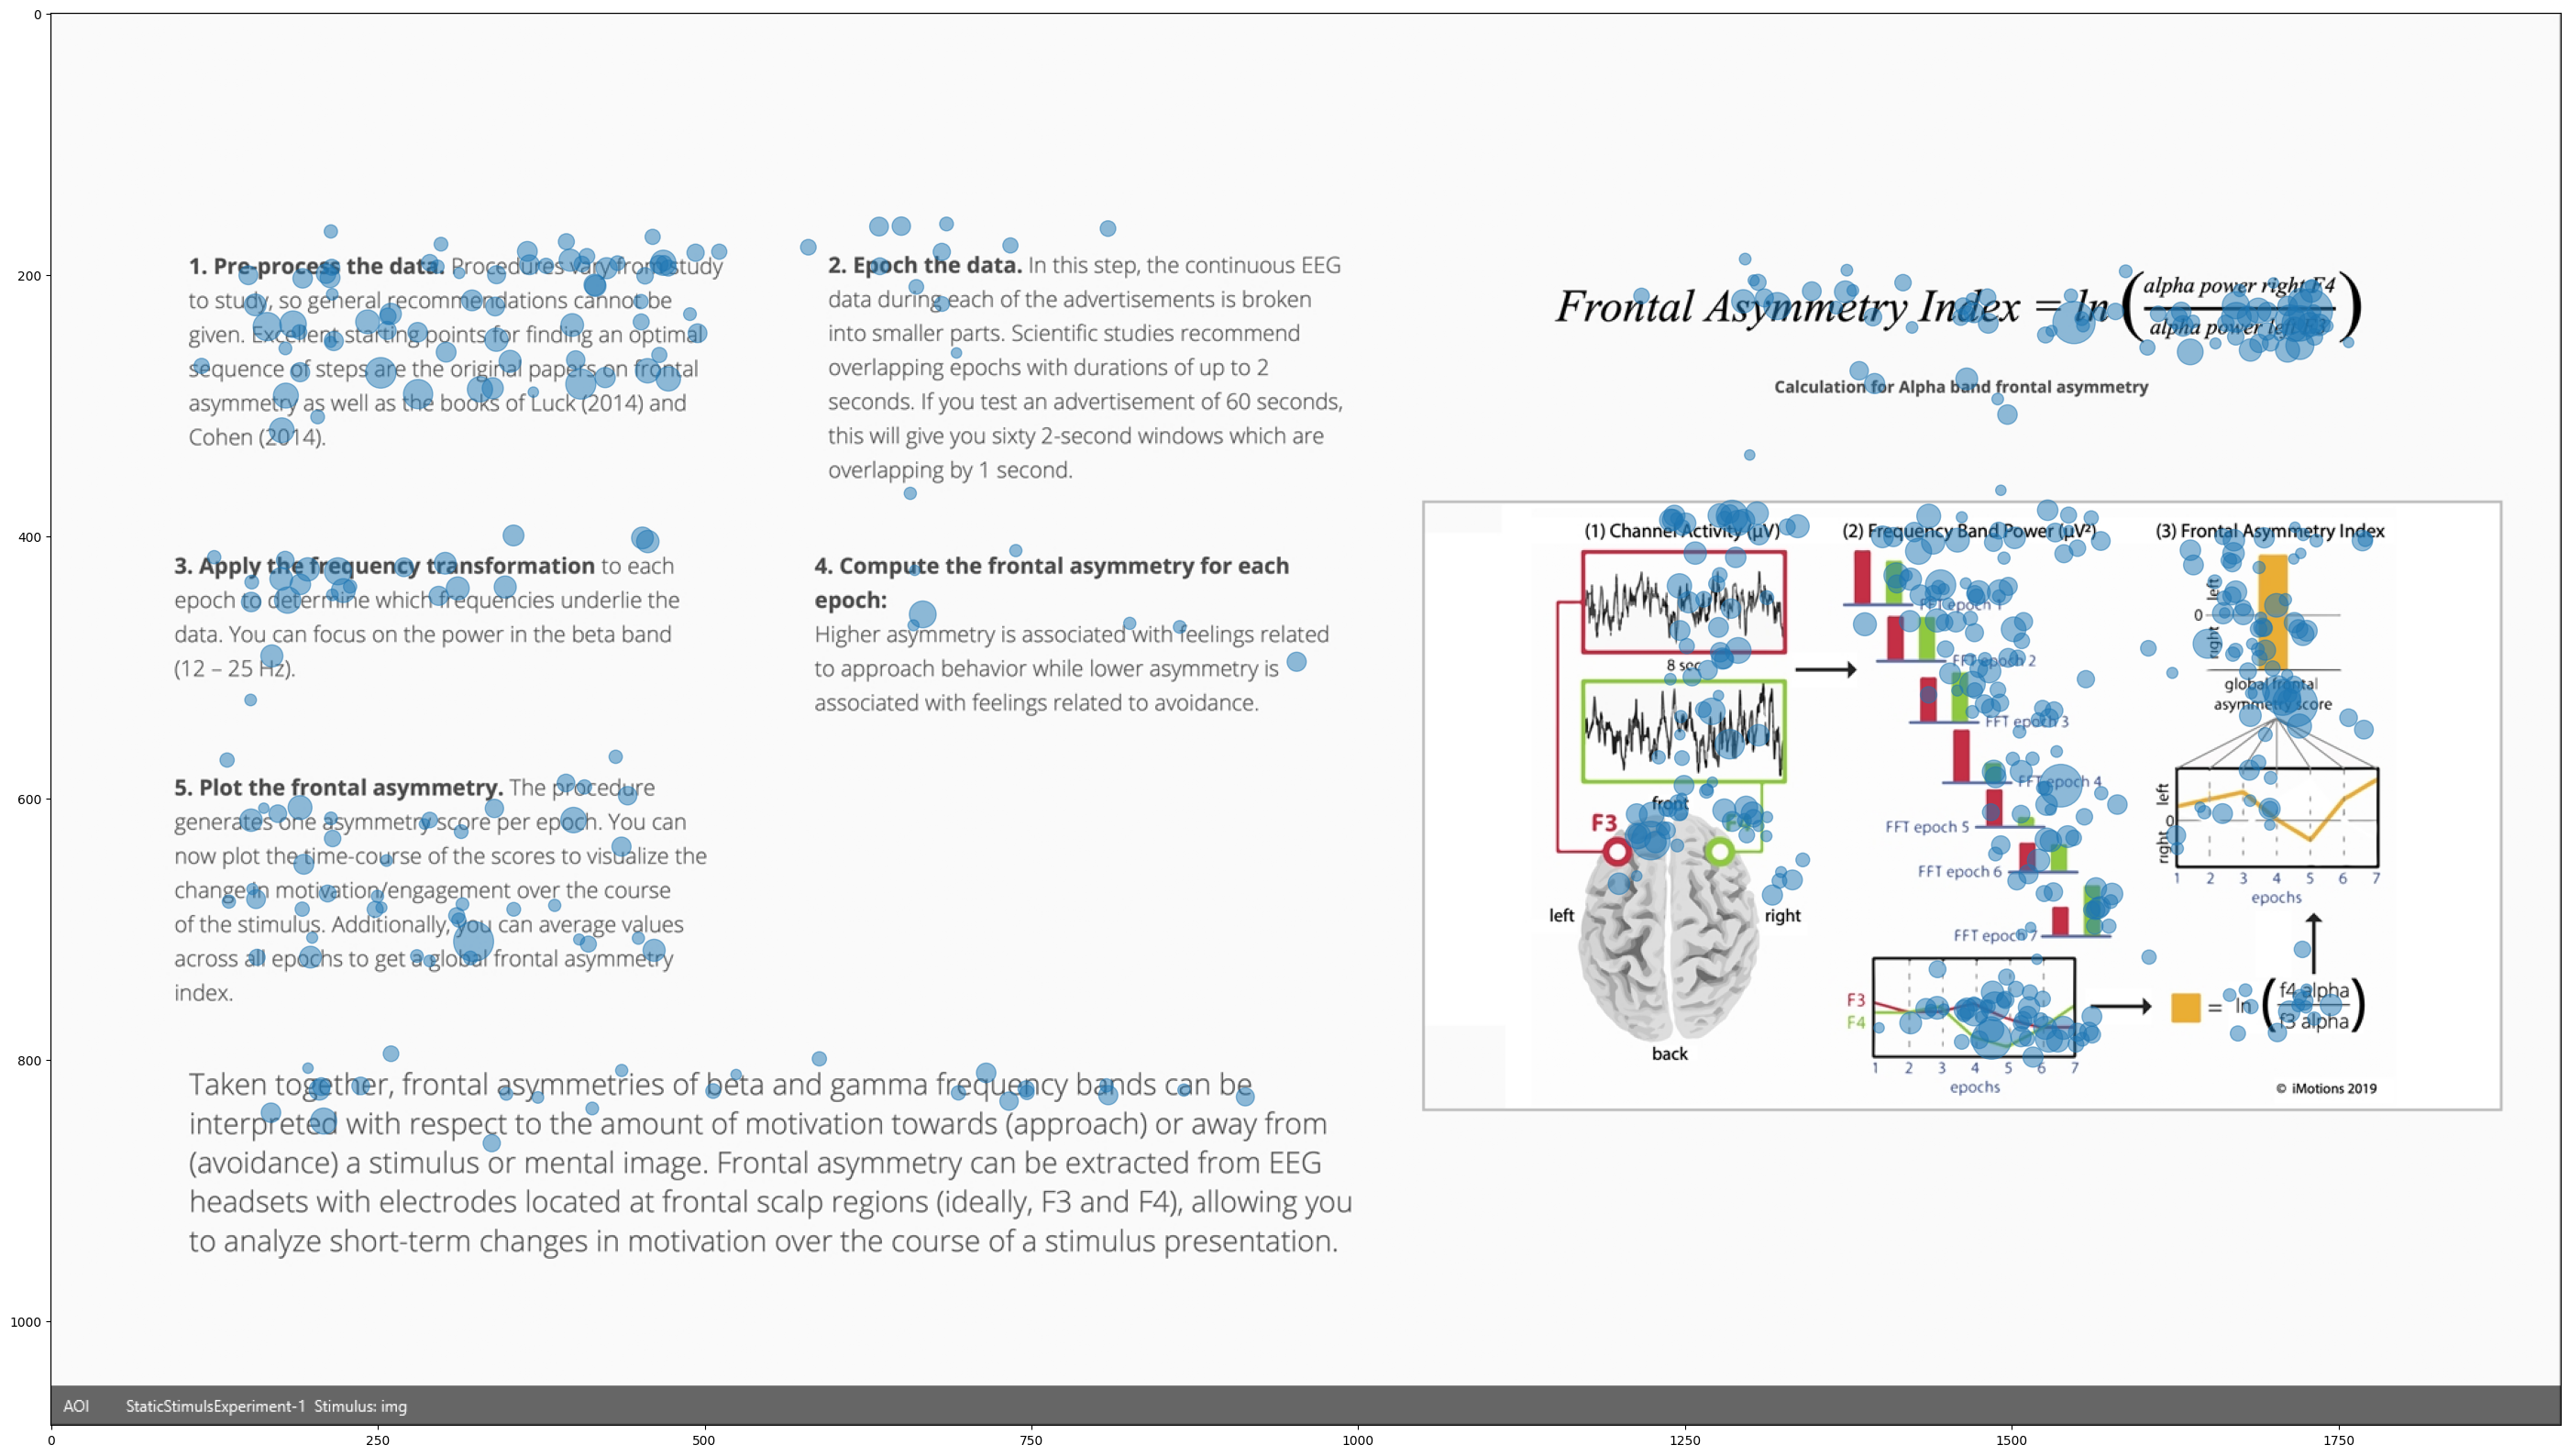

In [14]:
# Plot fixations
# Initiate a coordinate system with a background image
fig, ax = utils.initPlotContainer("data/stimulus.png")
# plot fixations (with the size of the markers relative to the fixation duration)
ax.scatter(fixationData["Fixation X"], fixationData["Fixation Y"], s= fixationData["Fixation Duration"], alpha=0.5)

In [15]:
# 2. Scan-path plot

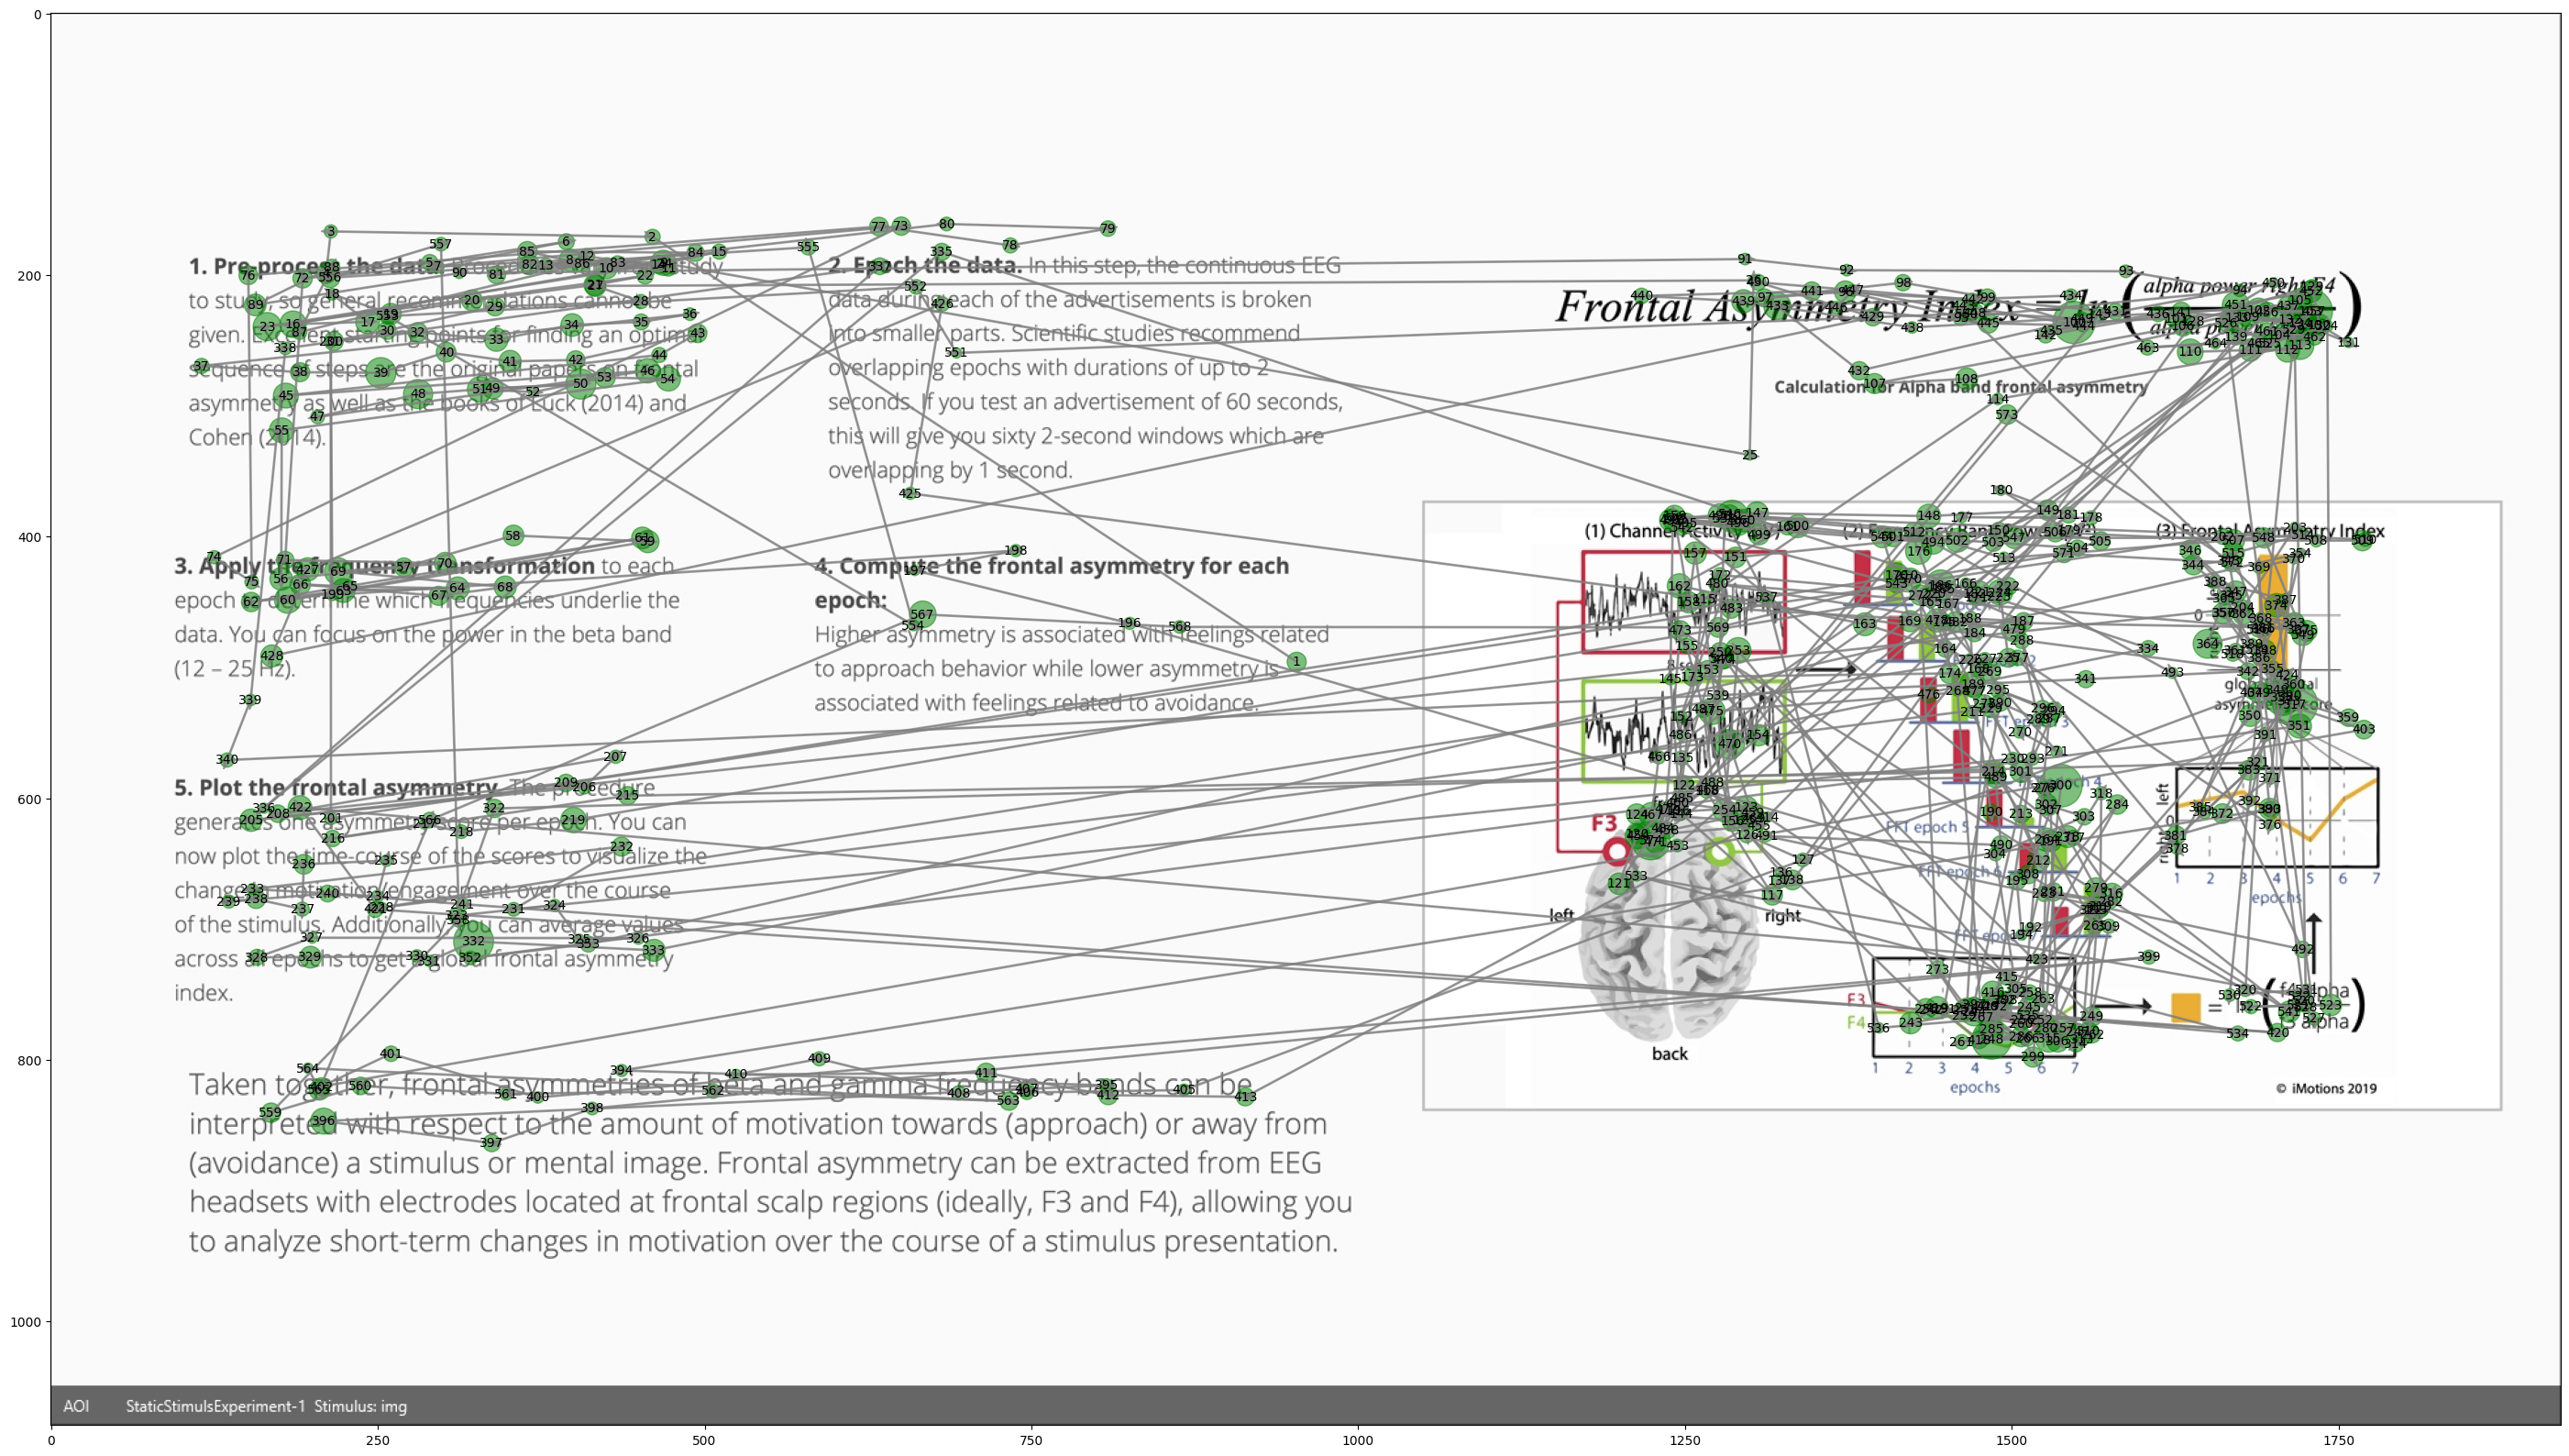

In [16]:
# Initiate a coordinate system with a background image
fig, ax = utils.initPlotContainer("data/stimulus.png")

# get the length of the fixations dataframe
fixationsDataFrameLength = len(fixationData)

# plot fixations (with the size of the markers relative to the fixation duration)
ax.scatter(fixationData["Fixation X"], fixationData["Fixation Y"], s= fixationData["Fixation Duration"], c='green', alpha=0.5)

# iterate through the fixations
for index, row in fixationData.iterrows():
    # assign an incremental number to each fixation      
    ax.annotate(str(index+1), (row['Fixation X'],row['Fixation Y']), alpha=1, horizontalalignment='center', verticalalignment='center', multialignment='center')
    # connect consecutive pairs of fixations with edges  
    if index<fixationsDataFrameLength-1:
        ax.arrow(row['Fixation X'],row['Fixation Y'], fixationData.iloc[index+1]['Fixation X']-row['Fixation X'],fixationData.iloc[index+1]['Fixation Y']-row['Fixation Y'], fc='grey', ec='grey', alpha=.7, fill=True, shape='full', width=1, head_width=5, head_starts_at_zero=False, overhang=0)

In [17]:
# 2. Heatmap plot

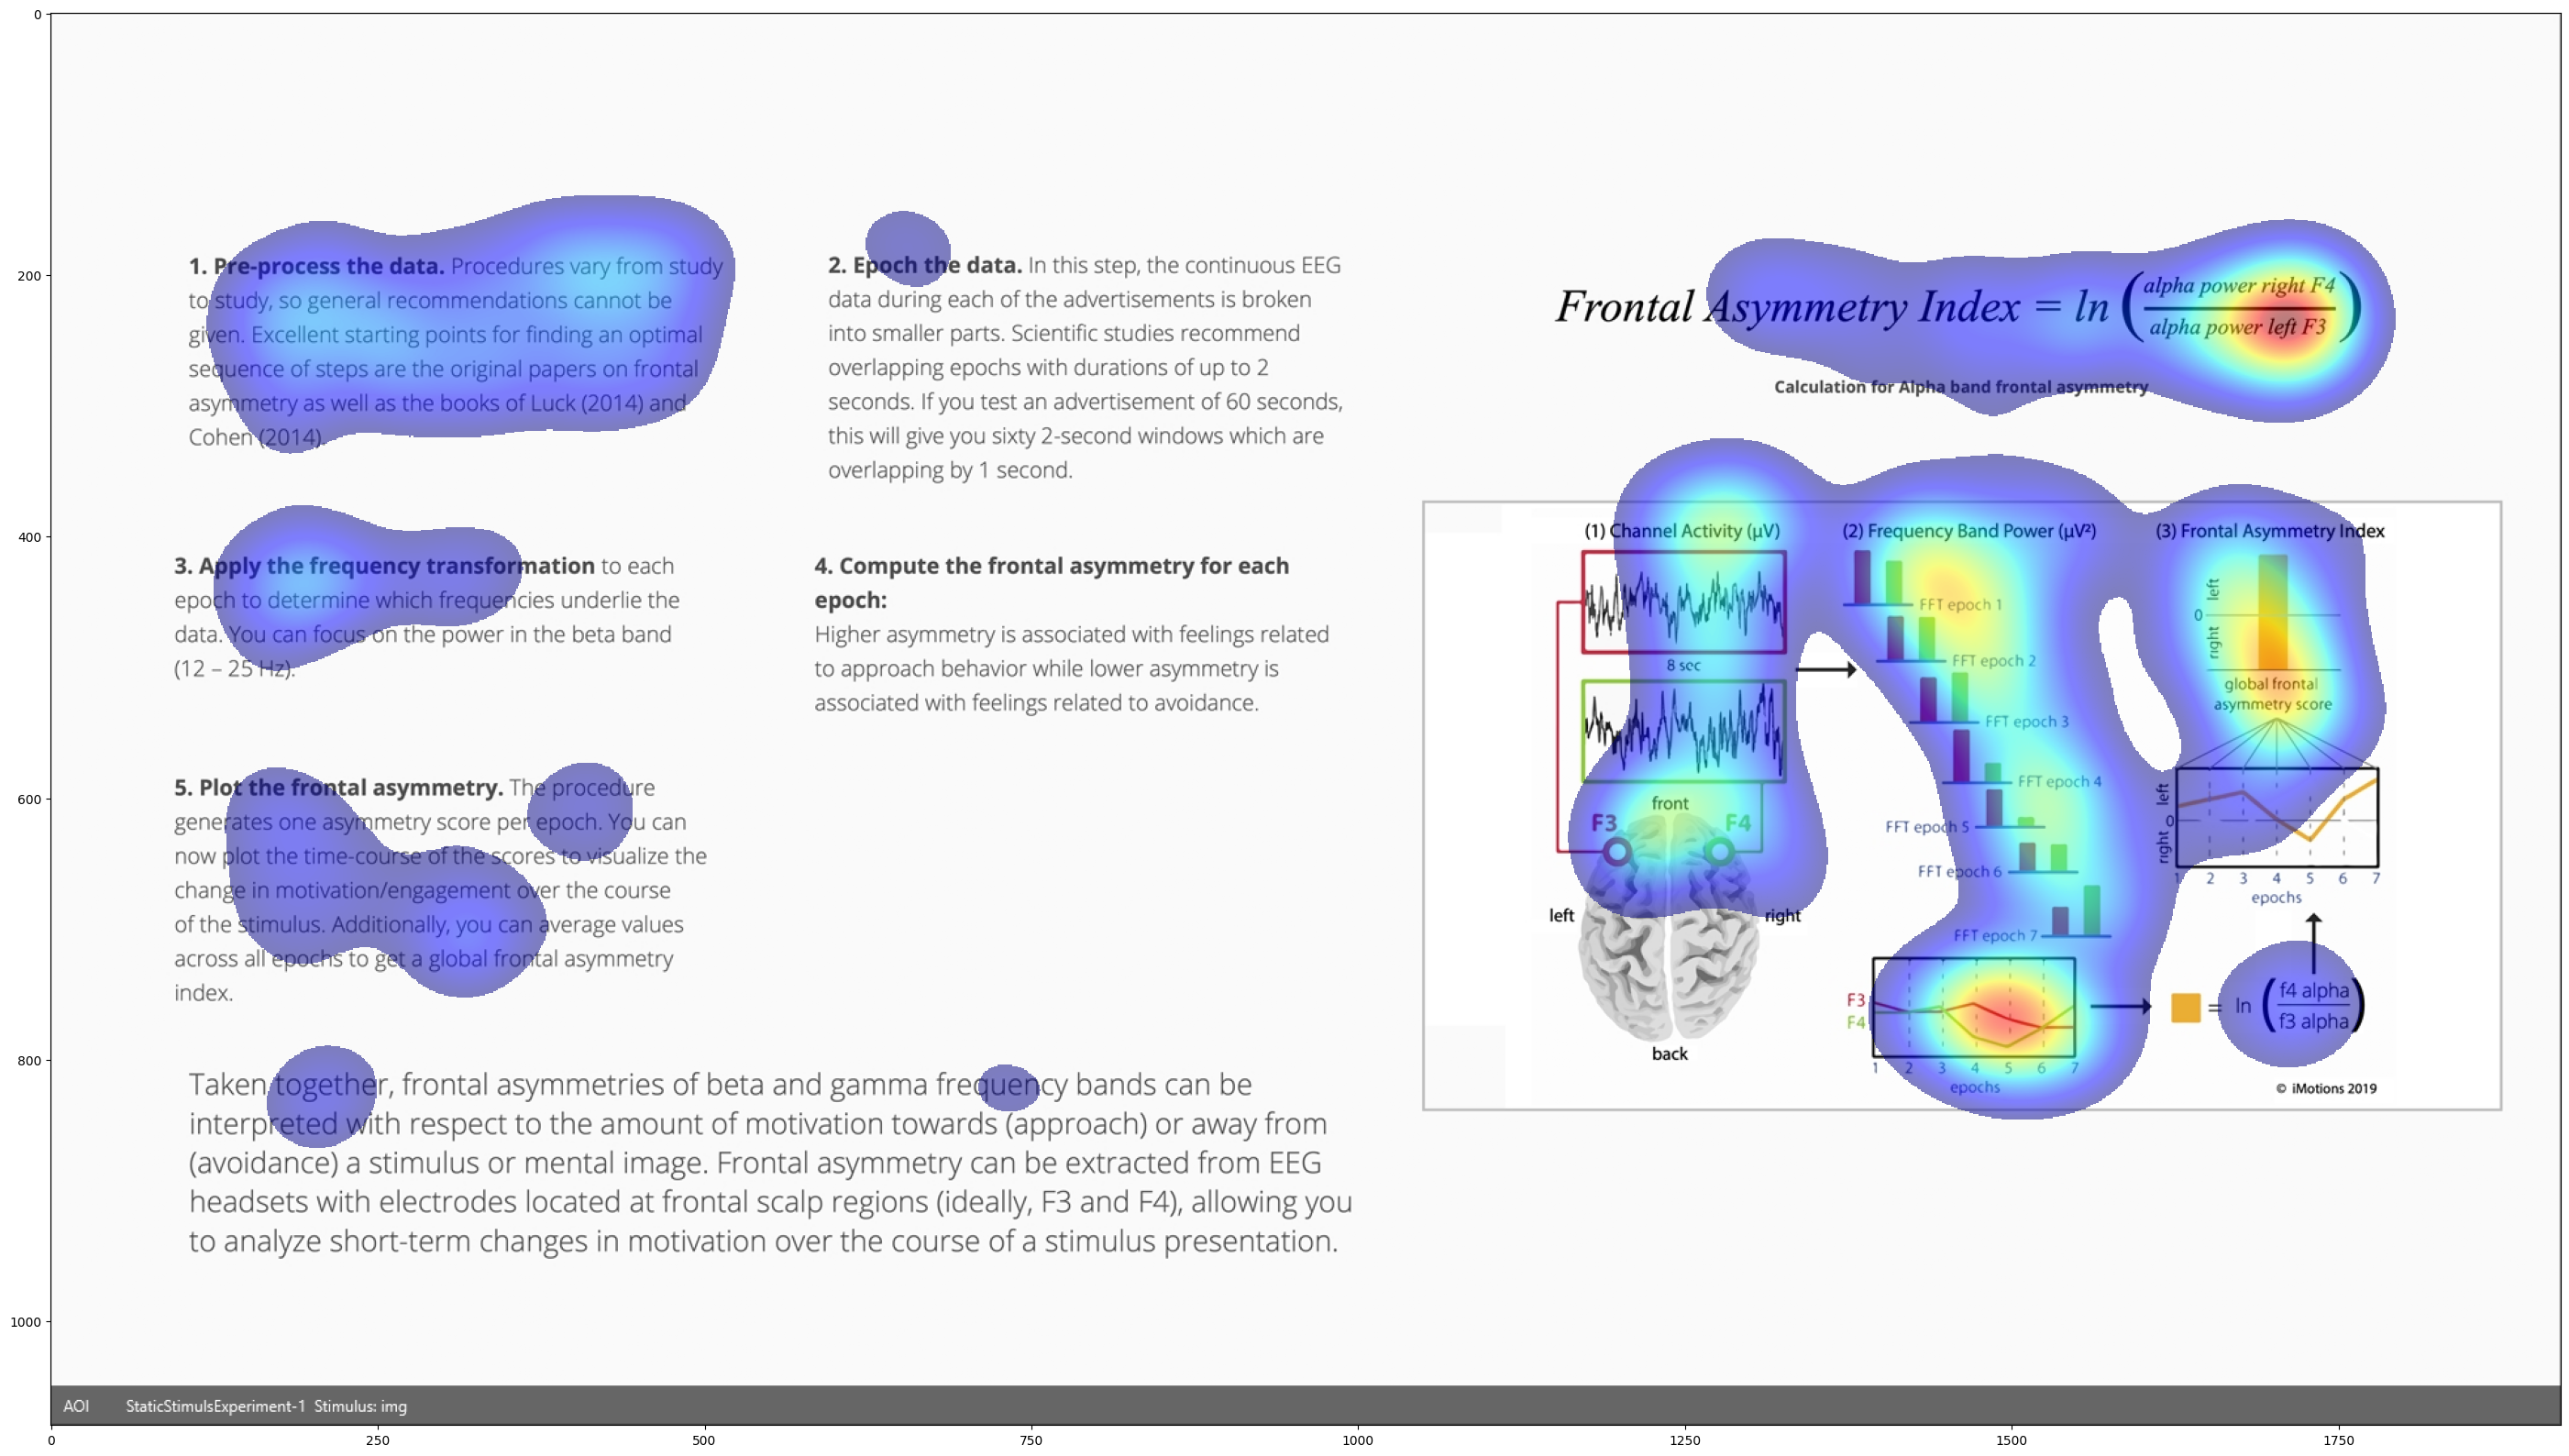

In [18]:
# Initiate a coordinate system with a background image
fig, ax = utils.initPlotContainer("data/stimulus.png")

# Gaussian settings
gwh = 200
gsdwh = gwh/6
gaus = utils.gaussian(gwh,gsdwh)

strt = int(gwh/2)
heatmapsize = int(DISPLAY_SIZE[1] + 2*strt), int(DISPLAY_SIZE[0] + 2*strt)
heatmap = numpy.zeros(heatmapsize, dtype=float)

# create heatmap (adapted from PyGazeAnalyser https://github.com/esdalmaijer/PyGazeAnalyser/)
for index, row in fixationData.iterrows():
    # get x and y coordinates of fixations
    # x and y - indices of heatmap array. must be integers
    x = strt + int(row['Fixation X']) - int(gwh/2)
    y = strt + int(row['Fixation Y']) - int(gwh/2)
    # correct Gaussian size if either coordinate falls outside of
    # display boundaries
    if (not 0 < x < DISPLAY_SIZE[0]) or (not 0 < y < DISPLAY_SIZE[1]):
        hadj=[0,gwh];vadj=[0,gwh]
        if 0 > x:
            hadj[0] = abs(x)
            x = 0
        elif DISPLAY_SIZE[0] < x:
            hadj[1] = gwh - int(x-DISPLAY_SIZE[0])
        if 0 > y:
            vadj[0] = abs(y)
            y = 0
        elif DISPLAY_SIZE[1] < y:
            vadj[1] = gwh - int(y-DISPLAY_SIZE[1])
        # add adjusted Gaussian to the current heatmap
        try:
            heatmap[y:y+vadj[1],x:x+hadj[1]] += gaus[vadj[0]:vadj[1],hadj[0]:hadj[1]] * row['Fixation Duration']
        except:
            # fixation was probably outside of display
            pass
    else:				
        # add Gaussian to the current heatmap
        heatmap[y:y+gwh,x:x+gwh] += gaus * row['Fixation Duration']

# resize heatmap
heatmap = heatmap[strt:DISPLAY_SIZE[1]+strt,strt:DISPLAY_SIZE[0]+strt]
# remove zeros
lowbound = numpy.mean(heatmap[heatmap>0])
heatmap[heatmap<lowbound] = numpy.NaN
# draw heatmap on top of image
ax.imshow(heatmap, cmap='jet', alpha=0.5)
